In [1]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from nrclex import NRCLex
from gensim.models import Word2Vec
# import tensorflow as tf
# from tensorflow.keras.preprocessing.text import Tokenizer
import pandas as pd
import re
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to C:\Users\Anmol
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Anmol
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Anmol
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Anmol
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Divide the Script into Scenes

In [2]:
# read csv file and convert to dataframe and print first 5 rows
def read_csv_file():
    df = pd.read_csv('movie_scripts_new.csv', encoding='utf-8')
    return df
movies = read_csv_file()

In [3]:
def arr_scence(string):
    arr = [string.start() for string in re.finditer('INT.', string)]
    arr = arr + [string.start() for string in re.finditer('EXT.', string)]
    arr.sort()
    scene = []
    for i in range(0,len(arr)):
        if i == 0:
            scene.append(string[0:arr[i]])
        else:
            scene.append(string[arr[i-1]:arr[i]])

    return scene

In [4]:
# split string 
def split_string(string, parts):
    length = len(string)
    return [string[i*length // parts: (i+1)*length // parts] for i in range(parts)]

Cleaning the script


In [5]:

moviesCleaned = []

# x = len(movies)
movieCount = len(movies)
for i in range(0, movieCount):
    token_arr = []
    for scene in split_string(str(movies['script'][i]),200):
        text = re.sub(r'\[[0-9]*\]', ' ', scene)
        text = re.sub(r'\s+', ' ', text)
        text = text.lower()
        text = re.sub(r'\d', ' ', text)
        text = re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '', text)
        text = re.sub('\W+',' ', text )
        text = word_tokenize(text)
        scene = []
        for word in text:
            if word not in stopwords.words('english'):
                scene.append(word)
                
        token_arr.append(scene)
    moviesCleaned.append(token_arr)

In [34]:
print(moviesCleaned[0][199])

['oks', 'even', 'effort', 'mr', 'orange', 'cop', 'mr', 'white', 'say', 'anything', 'keeps', 'stroking', 'orange', 'brow', 'mr', 'orange', 'sorry', 'sorry', 'mr', 'white', 'lifts', 'places', 'barrel', 'mr', 'orange', 'eyes', 'camera', 'moves', 'extreme', 'u', 'mr', 'white', 'sounds', 'outside', 'storm', 'inside', 'see', 'anything', 'hear', 'bunch', 'shotguns', 'cocking', 'police', 'force', 'os', 'freeze', 'motherfucker', 'drop', 'fucking', 'gun', 'mr', 'white', 'looks', 'smiles', 'pulls', 'trigger', 'bang', 'hear', 'burst', 'shotgun', 'fire', 'mr', 'white', 'blown', 'frame', 'leaving', 'empty']


Lemmatization

In [6]:

def lemmatize_words(words):
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = []
    for word in words:
        lemmatized_words.append(lemmatizer.lemmatize(word))
    return lemmatized_words
for i in range(0, movieCount):
    token_arr2 = []
    for token in moviesCleaned[i]:
        token_arr2.append(lemmatize_words(token))
        
    moviesCleaned[i] = token_arr2
    
    

In [37]:
print(moviesCleaned[49][199])

['find', 'rest', 'devil', 'torment', 'ripley', 'look', 'elapsed', 'time', 'counter', 'command', 'console', 'pull', 'pen', 'holder', 'add', 'ripley', 'whether', 'earth', 'exists', 'whether', 'end', 'heaven', 'hell', 'cold', 'vacuum', 'space', 'set', 'course', 'get', 'back', 'tube', 'close', 'lid', 'deep', 'space', 'escape', 'pod', 'move', 'jet', 'black', 'void', 'arceon', 'dwindles', 'darkness', 'behind', 'smouldering', 'slowly', 'dying', 'ember', 'screen', 'go', 'black', 'end', 'credit', 'roll', 'teenager', 'back', 'movie', 'theater', 'shout', 'dog']


Stemming

In [7]:
def stem_words(words):
    stemmer = PorterStemmer()
    stemmed_words = []
    for word in words:
        stemmed_words.append(stemmer.stem(word))
    return stemmed_words
# dicts = []
for i in range(0, movieCount):
    token_arr2 = []
    for token in moviesCleaned[i]:
        token = stem_words(token)
        token_arr2.append(token)
    moviesCleaned[i] = token_arr2

    # token_dictionary = {}
    # i=1
    # for token in moviesCleaned[i]:
    #     for word in token:
    #         if word not in token_dictionary:
    #             token_dictionary[word] = i
    #             i+=1
    # dicts.append(token_dictionary)

In [22]:
# print(dicts[0])

Creating and padding Sequences

In [8]:
for i in range(0, movieCount):
    for j in range(0, len(moviesCleaned[i])):
        s=''
        for k in range(0, len(moviesCleaned[i][j])):
            s = s + str(moviesCleaned[i][j][k]) + " "
            
        moviesCleaned[i][j] = s

In [11]:
print(moviesCleaned[500][2])

talk radio mike sheriff go die ext reservoir dam hank dam control offic radio sheriff hank right gon na let littl ext main street wayn phil two deputi near sheriff shore sandbag wall partial collaps phil think best turn twelv dad set treasur hunt realli cool wayn disdain look well wayn shrug whatev 


Finding the compound Scores of each scene

In [12]:
compoundScores = []
for i in range(0, movieCount):
    compound = []
    obj  = SentimentIntensityAnalyzer()
    for line in moviesCleaned[i]:
        sentiment  = obj.polarity_scores(line)
        # print(sentiment['compound'])
        compound.append(sentiment['compound'])
    compoundScores.append(compound)
    

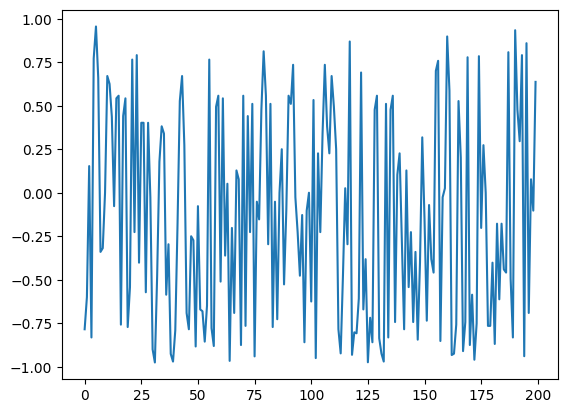

In [14]:
def plot_graph(compoundScores):
    plt.plot(compoundScores)
    plt.show()

plot_graph(compoundScores[500])

In [15]:
# make a csv with coumpound scores , movie name and genre
def make_csv(compoundScores):
    df = pd.DataFrame(columns=['movie', 'genre', 'compound'])
    for i in range(0, movieCount):
        # if sum of first 10 compound scores is greater than 0 append in df 
        if sum(compoundScores[i][0:10]) != 0:
            df = df.append({'movie': movies['name'][i], 'genre': movies['genre'][i], 'compound': compoundScores[i]}, ignore_index=True)  
        # if compoundScores[i][100] != 0:   
            # df = df.append({'movie': movies['name'][i], 'genre': movies['genre'][i], 'compound': compoundScores[i]}, ignore_index=True)
    df.to_csv('compoundScores.csv', index=False)
make_csv(compoundScores)

C:\Users\Anmol Singh\AppData\Local\Temp\ipykernel_8796\3562173609.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'movie': movies['name'][i], 'genre': movies['genre'][i], 'compound': compoundScores[i]}, ignore_index=True)
C:\Users\Anmol Singh\AppData\Local\Temp\ipykernel_8796\3562173609.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'movie': movies['name'][i], 'genre': movies['genre'][i], 'compound': compoundScores[i]}, ignore_index=True)
C:\Users\Anmol Singh\AppData\Local\Temp\ipykernel_8796\3562173609.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'movie': movies['name'][i], 'genre': movies['genre'][i], 'compound': compoundScores[i]}, ignore_index=True)
C:\User

finding top 5 movies 

In [2]:
# read csv file and convert to dataframe 
df = pd.read_csv('compoundScores.csv', encoding='utf-8')
# print(df['genre'])

0            action,crime,thriller
1                           comedy
2       animation,adventure,comedy
3                   comedy,romance
4          horror,mystery,thriller
                   ...            
1071                comedy,romance
1072          comedy,drama,romance
1073                comedy,romance
1074                drama,thriller
1075    animation,adventure,comedy
Name: genre, Length: 1076, dtype: object


In [71]:
query = 'Avengers, The'
# find movie in df
query_genre = df.loc[df['movie'] == query, 'genre'].iloc[0]
query_compound = df.loc[df['movie'] == query, 'compound'].iloc[0]
query_genre = query_genre.split(',')
query_compound = query_compound.replace('[', '').replace(']', '').split(',')
query_compound = [float(i) for i in query_compound]


creating a list with genre 

In [72]:
# create a list of movies with same genre
movies_with_same_genre = []
for i in range(0, len(df)):
    genre = str(df['genre'][i]).split(',')
    if set(query_genre).intersection(genre):
        movies_with_same_genre.append(df['movie'][i])
# remove duplicate movies 
movies_with_same_genre = list(dict.fromkeys(movies_with_same_genre))
# print(movies_with_same_genre)

In [73]:
#  find compound scores of movies with same genre
def find_compound_scores(movies_with_same_genre):
    compound_scores = []
    for i in range(0, len(movies_with_same_genre)):
        compound = df.loc[df['movie'] == movies_with_same_genre[i], 'compound'].iloc[0]
        compound = compound.replace('[', '').replace(']', '').split(',')
        compound = [float(i) for i in compound]
        compound_scores.append(compound)
    return compound_scores

# print(find_compound_scores(movies_with_same_genre))

In [74]:
from numpy import dot
from numpy.linalg import norm
# find cosine similarity between query and movies with same genre
def find_cosine_similarity(query_compound, compound_scores):
    cosine_similarity = []
    for i in range(0, len(compound_scores)):
        cosine_similarity.append(dot(query_compound, compound_scores[i])/(norm(query_compound)*norm(compound_scores[i])))
    return cosine_similarity
# print(find_cosine_similarity(query_compound, find_compound_scores(movies_with_same_genre)))


In [70]:
# # print in descending order of cosine similarity and movie name
# def print_movies(cosine_similarity, movies_with_same_genre):
#     for i in range(0, len(cosine_similarity)):
#         print(movies_with_same_genre[i], cosine_similarity[i])
# #  sort cosine similarity in descending order and print movies
# def sort_and_print(cosine_similarity, movies_with_same_genre):
#     cosine_similarity, movies_with_same_genre = zip(*sorted(zip(cosine_similarity, movies_with_same_genre), reverse=True))
#     print_movies(cosine_similarity, movies_with_same_genre)
# sort_and_print(find_cosine_similarity(query_compound, find_compound_scores(movies_with_same_genre)), movies_with_same_genre)

In [75]:
# find top 6 movies with same genre
def find_top_6_movies(cosine_similarity, movies_with_same_genre):
    top_6_movies = []
    for i in range(0, 6):
        top_6_movies.append(movies_with_same_genre[cosine_similarity.index(max(cosine_similarity))])
        cosine_similarity.remove(max(cosine_similarity))
    return top_6_movies

print(find_top_6_movies(find_cosine_similarity(query_compound, find_compound_scores(movies_with_same_genre)), movies_with_same_genre))

['Avengers, The', 'Into The Woods', 'White Squall', 'Crow Salvation, The', 'True Romance', 'Man On Fire']


In [ ]:
# query = compoundScores[0]
# # take query and find the most similar movie
# def find_similar(query):
#     mostSimilar = 0
#     mostSimilarIndex = 0
#     for i in range(0, len(compoundScores)):
#         similarity = 0
#         for j in range(0, min_length(compoundScores)):
#             similarity += abs(query[j] - compoundScores[i][j])
#         if similarity > mostSimilar:
#             mostSimilar = similarity
#             mostSimilarIndex = i
#     return mostSimilarIndex

# find_similar(query)
# print(compoundScores[0])
# print(compoundScores[find_similar(query)])

In [29]:
# query = compoundScores[0]

# from numpy import dot
# from numpy.linalg import norm

# # take query and find the most similar movie
# def find_similar(query):
#     mostSimilar = 0
#     mostSimilarIndex = 0
#     for i in range(1, len(compoundScores)):
#         similarity = dot(query, compoundScores[i])/(norm(query)*norm(compoundScores[i]))
#         if similarity > mostSimilar:
#             mostSimilar = similarity
#             mostSimilarIndex = i
#     return mostSimilarIndex

# find_similar(query)
# print(compoundScores[0])
# print(compoundScores[find_similar(query)])

C:\Users\Anmol Singh\AppData\Local\Temp\ipykernel_13660\3096620175.py:11: RuntimeWarning: invalid value encountered in double_scalars
  similarity = dot(query, compoundScores[i])/(norm(query)*norm(compoundScores[i]))


49